<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.975 · Deep Learning · PAC1</p>
<p style="margin: 0; text-align:right;">2021-2 · Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudi d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PAC 1: Xarxes neuronals artificials

En aquesta pràctica implementarem xarxes neuronals artificials per resoldre problemes de:


* Classificació
* Regressió


**Important: El lliurament s'ha de fer en format notebook i en format html on es vegi el codi i els resultats i comentaris de cada exercici. Per exportar el notebook a html es pot fer des del menú File $\to$ Download as $\to$ HTML.**

## 0. Context i càrrega de llibreries

El codi següent carrega els paquets necessaris per a la pràctica i llegeix el fitxer de dades que farem servir.

Les dades contenen informació sobre cotxes de segona mà, les seves característiques i el preu de revenda en euros. En un primer exercici dissenyarem un model que ens permeti classificar els cotxes en tres grups segons la gamma de preu. En el segon exercici dissenyarem un model de regressió per predir el preu de revenda.

In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import timeit

import keras
from keras.models import Sequential, Model
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [36]:
##To read directly from Drive in Google Colab use:
#from google.colab import drive
#drive.mount('/content/drive')
#input path: "./drive/MyDrive/CarPricesData.pkl"

##To read in Kaggle, upload file in Kaggle 
##input path: "/kaggle/input/botnetdl/botnet_dataset_DL.csv"

In [37]:
df = pd.read_csv("./dataset.csv") #change path if needed

In [38]:
df.head(5)

,months_old,km,fuel_type,horsepower,metcolor,automatic,size_engine,doors_num,weight,price
0,73,97494,Petrol,110,1,0,1600,5,1085,10950
1,48,89049,Petrol,97,1,0,1400,5,1060,13500
2,40,161000,Diesel,69,1,0,1900,3,1105,13950
3,37,38812,Petrol,97,0,0,1400,3,1025,13450
4,55,33230,Petrol,110,0,0,1600,3,1050,13500


## 1. Exploració (1 punt)



En primer lloc, explorarem el conjunt de dades. 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici (1 punt):</strong> Explora les dades:

<ul>
        
<li> Indica la mida del dataset i el nombre de variables categòriques i contínues del conjunt de dades</li>
<li> Grafica les distribucions de les variables categòriques i de les contínues</li>
<li> Genera una taula de correlacions de totes les variables usant la llibreria <code>seaborn</code>, mostrant a cada casella el valor de la correlació</li>
<li> Genera una taula (usant la llibreria <code>seaborn</code>) que mostri únicament les correlacions entre el preu i la resta de variables, ordenada de major a menor segons els valors de correlació</li>
<li> Comenta els resultats de l'exploració de dades</li>
</ul>

</div>



*   **Variables**



In [39]:
#Dataset size
df.shape

(1436, 10)

In [40]:
#Number of categorical and continuous variables
num_categorical_variables = len(df.select_dtypes(exclude=[np.number]).columns)
num_continuous_variables = len(df.select_dtypes(include=[np.number]).columns)

print("Tenim {} columnes categoriques i {} columnes contínues.".format(num_categorical_variables, num_continuous_variables))

Tenim 1 columnes categoriques i 9 columnes contínues.


*   **Distribucions**





<AxesSubplot:xlabel='fuel_type'>

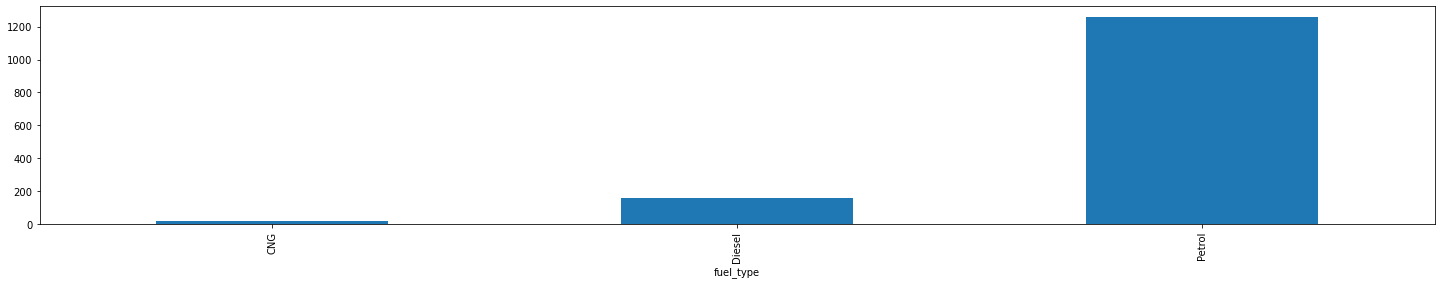

In [41]:
#Distributions of categorical variables
fig, ax = plt.subplots(nrows=1, ncols=num_categorical_variables, figsize=(25,4))
GroupedData = df.groupby(by='fuel_type').size()
GroupedData.plot.bar()

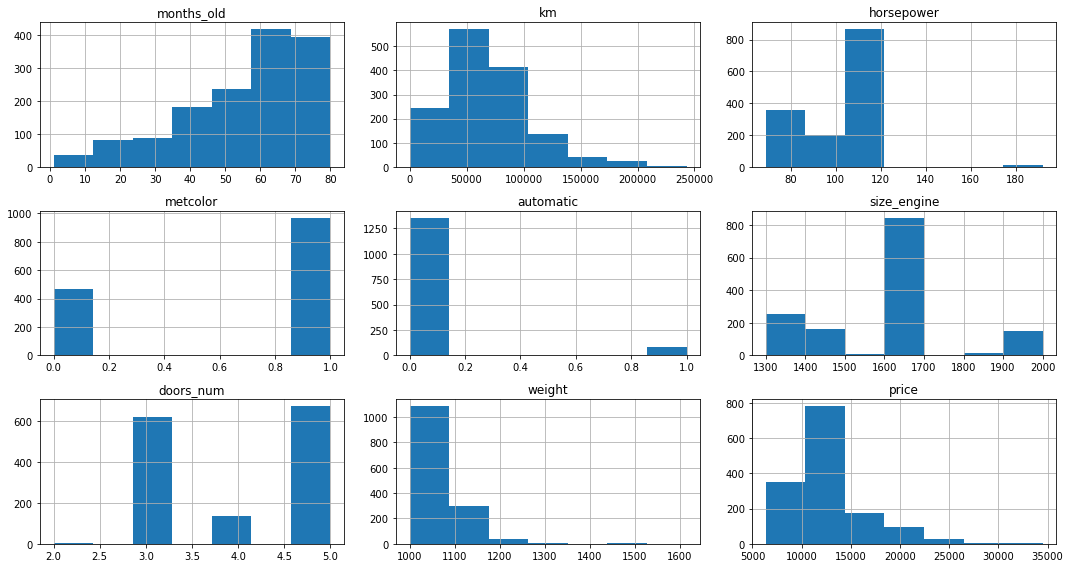

In [42]:
#Distributions continuous variables
#fig, ax = plt.subplots(nrows=1, ncols=num_continuous_variables, figsize=(25,4))
df.hist(bins=7, figsize=(15,8))
plt.tight_layout()
plt.show()

*   **Correlacions**




In [43]:
#Convertim la variable categòrica "fuel_type" a numèrica

df["fuel_type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [44]:
df['fuel_type'].replace(['Petrol', 'Diesel', 'CNG'],
                        [0, 1, 2], inplace=True)

In [45]:
display(df.head())
print(df["fuel_type"].unique())

,months_old,km,fuel_type,horsepower,metcolor,automatic,size_engine,doors_num,weight,price
0,73,97494,0,110,1,0,1600,5,1085,10950
1,48,89049,0,97,1,0,1400,5,1060,13500
2,40,161000,1,69,1,0,1900,3,1105,13950
3,37,38812,0,97,0,0,1400,3,1025,13450
4,55,33230,0,110,0,0,1600,3,1050,13500


[0 1 2]


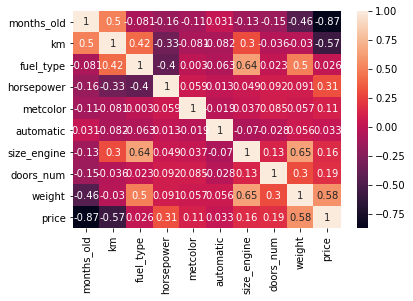

In [46]:
#All variables correlations
sns.heatmap(df.corr(), annot = True);

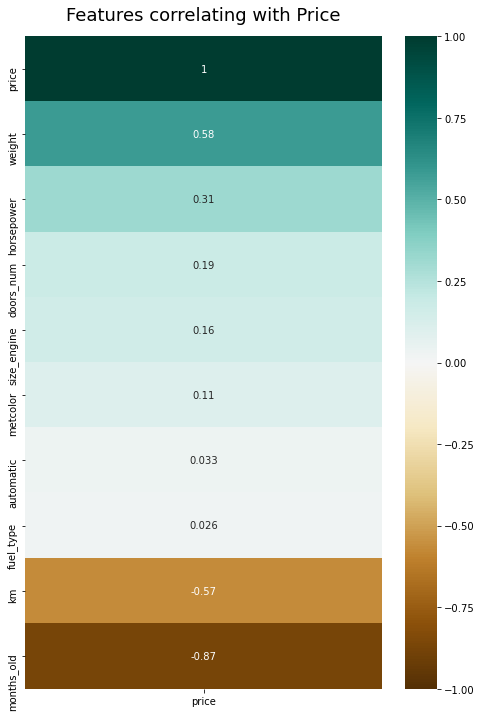

In [47]:
#Features correlating with Price
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features correlating with Price', fontdict={'fontsize':18}, pad=16);



*   **Comentaris resultat exploració**



<font color='blue'>D'aquesta primera exploració en podem fer diversos comentaris. De la classe categòrica fuel_type veiem que la
gran majoria de dades de les que disposem son de cotxes amb Petrol. De les variables continues també podem destacar
que hi ha elements molt més presents que d'altres, com per exemple el horsepower o el fet de ser un cotxe automàtic
o no.

Les correlacions amb el preu segueixen el patró que ens podriem imaginar, les variables que hi afecten mes
son els km del cotxe i la seva antiguitat. Les dues variables hi afecten de manera negativa, ja que com més
vell és el cotxe i més km porta, inferior serà el preu.)

## 2. Xarxa neuronal artificial: Classificació (4.5 punts)


En aquest apartat entrenarem un model que intenti classificar els cotxes segons la gamma de preu. Per això crearem una nova variable com a indicador de qualitat del cotxe (gamma baixa, mitjana o alta), seguint les condicions següents:



* _low-end_: preu menor que 11000 euros
* _medium-end_: preu major o igual que 11000 euros i menor que 13000
* _high-end_: preu major o igual que 13000



### Pre-processat


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici (0.75 punts):</strong> Pre-processa les dades:

<ul>
        
<li> Crea una nova variable <code>quality</code> que inclogui la gamma del cotxe, amb les condicions indicades</li>
<li> Mostra l'histograma de la nova variable <code>quality</code></li>
<li> Crea els vectors de variables dependents (<i>features</i>) i de la variable independent (<i>labels</i>)</li>
<li> Normalitza les dades degudament i binaritza el vector d'etiquetes (<i>labels</i>) </li>
<li> Divideix el conjunt de dades en 80% per a entrenament i 20% per a test, usant la funció <code>train_test_split</code></li>
<li> Mostra les dimensions dels conjunts d'entrenament i test</li>
</ul>
</div>

In [48]:
#Create new variable: quality
conditions = [
    (df['price'] >= 0) & (df['price'] < 11000),
    (df['price'] >= 11000 ) & (df['price'] < 13000),
    (df['price'] >= 13000)
]

# create a list of the values we want to assign for each condition
values = ['low-end', 'medium-end', 'high-end']

df['quality'] = np.select(conditions, values)
df['quality'].unique()

array(['low-end', 'high-end', 'medium-end'], dtype=object)

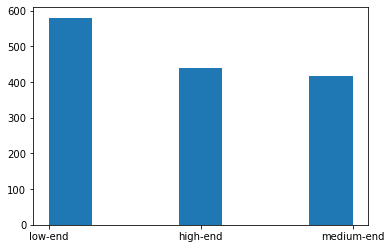

In [49]:
#Histogram car quality
plt.hist(df['quality'], bins = 7)
plt.show()

In [50]:
#Create features and labels vectors
dataset = df.values
features = dataset[:,0:8].astype(float)
labels = dataset[:,10]

In [51]:
#Normalize the corresponding data
scaler = StandardScaler()
normalized = scaler.fit_transform(features)

In [52]:
#Binarize the labels
from sklearn.preprocessing import label_binarize

binarized = label_binarize(labels, classes=['low-end', 'high-end', 'medium-end'])

In [53]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    normalized, binarized, test_size=0.20, random_state=42)

In [54]:
#Shapes
print("Train size is {}".format(X_train.shape))
print("Test size is {}".format(X_test.shape))

Train size is (1148, 8)
Test size is (288, 8)


### Model base


Començarem dissenyant un model base amb 4 capes ocultes.

Nota: Per a l'ajust del model farem servir les dades de test com a conjunt de validació.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici (1.25 punts):</strong> Implementa el model de xarxa neuronal artificial:
<ul>
<li> Dissenya l'arquitectura per al model de classificació amb la funció d'activació adequada per a la capa de sortida i amb les característiques següents:</li>
    <ul>
    <li> 4 capes ocultes amb 64, 32, 10, 8 neurones successivament</li>
    <li> Funció d'activació de les capes intermèdies: ReLU</li>
    </ul>

<li> Compila el model amb la funció de pèrdua més adequada, l'optimitzador Adam, una velocitat d'aprenentatge de 0.1, i la mètrica Accuracy.</li>

<li> Ajusta el model amb 20 èpoques i una mida del batch de 64</li>

<li> Mostra les gràfiques d'<i>accuracy</i> i <i>loss</i>. A cada gràfica s'ha de visualitzar la corba d'entrenament i la de validació</li>
</ul>
</div>

In [55]:
#Create ANN model
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(10, activation="relu"))
model.add(keras.layers.Dense(8, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))

In [56]:
#Compile
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [57]:
#Fit
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=20, batch_size=64, verbose=0)

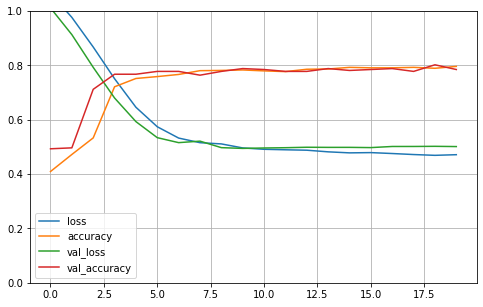

In [58]:
#Plots 
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Influència velocitat aprenentatge i optimitzador

Un cop tenim el model base, analitzarem la influència que poden tenir la velocitat daprenentatge i el tipus doptimitzador en la millora del rendiment.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici (1.5 punts):</strong> Implementa una funció per entrenar l'arquitectura de l'exercici anterior per a 4 optimitzadors diferents: Adam, SGD, Adadelta, Adagrad, i 4 velocitats d'aprenentatge: 0.001, 0.01, 0.05, 0.1.
Entrena els models i representa dues gràfiques:
  <ul>
      <li> Temps d'entrenament vs Velocitat d'aprenentatge</li>
      <li>  <i>Accuracy</i> vs Velocitat d'aprenentatge</li>
</ul>
    
Cada gràfica ha d'incloure l'evolució obtinguda pels quatre optimitzadors per poder-los comparar millor.
    
-----------------------------------------------------------------------------------------------------------
<b>Important</b>: per al lliurament de la PAC, fixar el paràmetre <code>verbose = 0</code> a l'entrenament dels models. La solució només ha de mostrar les gràfiques resultants.
</div>

In [59]:
learning_rates = [0.001, 0.01, 0.05, 0.1]
optimizers = [Adam, SGD, Adadelta, Adagrad]

In [60]:
def fit_model(optimizer, trainX, trainy, testX, testy, lrate):
    # define model
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dense(32, activation="relu"))
    model.add(keras.layers.Dense(10, activation="relu"))
    model.add(keras.layers.Dense(8, activation="relu"))
    model.add(keras.layers.Dense(3, activation="softmax"))
    
    # compile model
    opt = optimizer(learning_rate=lrate)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model
    history = model.fit(X_train, y_train,
                        validation_data=(testX, testy), 
                        epochs=20, batch_size=64, verbose=0)
    # plot learning curves
    plt.plot(history.history['accuracy'])
    plt.title('Learning rate vs accuracy', pad=-50)

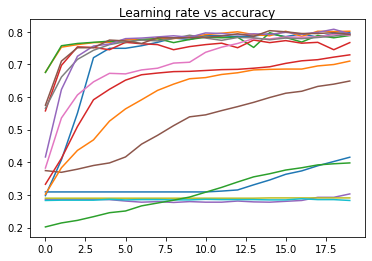

In [61]:
for j in range(len(optimizers)):
    for i in range(len(learning_rates)):
        fit_model(optimizers[j], X_train, y_train, X_test, y_test, learning_rates[i])

### Elecció del millor model

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici (1 punt):</strong> Identifica el valor de la velocitat d'aprenentatge i de l'optimitzador que donen millor rendiment al model, segons els resultats de l'exercici anterior:
<ul>
    
<li> Justifica l'elecció</li>
<li> Compila i entrena el model triat</li>
<li> Mostra les corresponents gràfiques d'<i>Accuracy</i> i <i>Loss</i> dels conjunts d'entrenament i validació, i indica l'<i>Accuracy</i> del model </li>
<li> Mostra la matriu de confusió multi-classe amb les etiquetes originals de <code>quality</code> (<i>low-end</i>, <i>medium-end</i>, <i>high-end</i>)</li>
<li> Mostra la precisió, recall i F1-score resultants per a cada etiqueta</li>
<li> Comenta els resultats obtinguts</li>
</ul>
</div>

In [62]:
#Function to compute several models changing Optimizers and learning rate
def build_model(optimizerss, learning_rate):
    opt = optimizerss(learning_rate = learning_rate)
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dense(32, activation="relu"))
    model.add(keras.layers.Dense(10, activation="relu"))
    model.add(keras.layers.Dense(8, activation="relu"))
    model.add(keras.layers.Dense(3, activation="softmax"))

    model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

<ipython-input-62-ea6cfc49e0e7>:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [63]:
#Compute models
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "optimizerss": [Adam, SGD, Adadelta, Adagrad],
    "learning_rate": [0.001, 0.01, 0.05, 0.1],
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
history_all = rnd_search_cv.fit(X_train, y_train,
                                validation_data=(X_test, y_test),
                                epochs=20, batch_size=64,
                                callbacks=[keras.callbacks.EarlyStopping(patience=10)], verbose=0)

12/12 [==============================] - 0s 546us/step - loss: 0.6234 - accuracy: 0.7356


In [71]:
#Best model justification
print("Amb les funcions que ens proporciona RandomizedSearchCV podem saber directament quin és el millor model dels que hem testejat:\n")
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)
model = rnd_search_cv.best_estimator_.model

print("\nEn aquest cas veiem que és SGD, amb un learning rate de 0.1")

Amb les funcions que ens proporciona RandomizedSearchCV podem saber directament quin és el millor model dels que hem testejat:

{'optimizerss': <class 'keras.optimizer_v2.gradient_descent.SGD'>, 'learning_rate': 0.1}
-0.5408360759417216

En aquest cas veiem que és SGD, amb un learning rate de 0.1


In [72]:
#Create, compile and fit ANN BEST model
opt = SGD(learning_rate = 0.1)
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(10, activation="relu"))
model.add(keras.layers.Dense(8, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))
model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=20, batch_size=64, verbose=0)

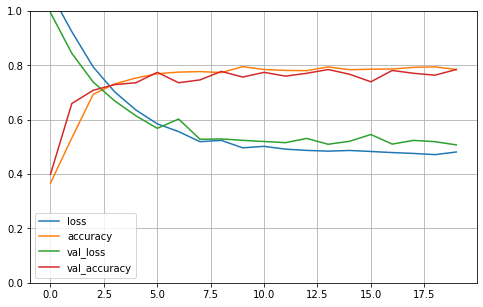

In [73]:
#Plots
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [74]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

y_pred_class = np.argmax(model.predict(X_test), axis=-1)
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
confusion_matrix(y_test_class, y_pred_class)

array([[101,   0,  14],
       [  2,  75,   8],
       [ 26,  12,  50]], dtype=int64)

In [75]:
#Accuracy, Precision, Recall and F1-score for each label
from sklearn.metrics import classification_report

print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       115
           1       0.86      0.88      0.87        85
           2       0.69      0.57      0.62        88

    accuracy                           0.78       288
   macro avg       0.78      0.78      0.77       288
weighted avg       0.78      0.78      0.78       288



* **Comment results**

<font color='blue'>Obtenim uns resultats bastant bons, però en aquest cas particular no s'observa una gran millora respecte al model que haviem entrenat anteriorment, ja que obtenim una accuracy semblant.
    
Els resultats de la matriu de confusió són prou bons, però veiem que el model es comporta millor amb les etiquetes 0 i 1 en comparació a la classe 2. Per tant, el model té més dificultats a predir els cotxes de gamma alta.

## 3. Xarxa neuronal artificial: Regressió (4.5 punts)

En aquest apartat resoldrem un problema de regressió intentant predir el preu de revenda segons les característiques dels cotxes. Partirem del conjunt de dades original.

### Pre-processat




<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici (0.5 punts):</strong> Pre-processa les dades:
<ul>
<li> Crea els vectors de variables dependents (<i>features</i>) i de la variable independent (<i>target</i>)</li>
<li> Normalitza degudament les dades</li>
<li> Divideix el conjunt de dades en 70% per a entrenament i 30% per a test, usant la funció <code>train_test_split</code></li>
<li> Mostra les dimensions dels conjunts d'entrenament i test</li>
</ul>
</div>

In [77]:
#Create features and target vectors
df = pd.read_csv("./dataset.csv")
df['fuel_type'].replace(['Petrol', 'Diesel', 'CNG'],
                        [0, 1, 2], inplace=True)
dataset = df.values
features = dataset[:,0:9].astype(float)
target = dataset[:,9]

In [78]:
#Normalizing the data
scaler = StandardScaler()
df_normalized = scaler.fit_transform(dataset)

features = df_normalized[:,0:9].astype(float)
target = df_normalized[:,9]


In [79]:
#Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.30, random_state=42)

In [80]:
#Dimensions
print("Train size is {}".format(X_train.shape))
print("Test size is {}".format(X_test.shape))

Train size is (1005, 9)
Test size is (431, 9)


### Model base

En primer lloc dissenyarem un model base amb tres capes ocultes.

Nota: Per a l'ajust del model farem servir les dades de test com a conjunt de validació.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici (1 punt):</strong> Implementa el model de xarxa neuronal artificial:
<ul>
<li>Dissenya l'arquitectura per al model de regressió amb les característiques següents:</li>
     <ul>
    <li>1 primera capa oculta completament connectada de 128 neurones i activació ReLU</li>
    <li>2 capes ocultes de 32 i 16 neurones i activació tangencial</li>
    <li>Totes les capes han de tenir <code>kernel_initizalizer</code> en mode 'normal'</li>
    </ul>
<li>Compila el model amb la funció de pèrdua més adequada i l'optimitzador Adam</li>

<li>Ajusta el model amb 50 èpoques i una mida del batch de 32</li>

<li>Mostra la gràfica de pèrdua. A la gràfica s'ha de visualitzar la corba d'entrenament i la de validació</li>
</ul>
</div>

In [81]:
#Create ANN model
model = keras.models.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=X_train.shape[1:], kernel_initializer='normal'),
    keras.layers.Dense(32, activation="tanh", kernel_initializer='normal'),
    keras.layers.Dense(16, activation="tanh", kernel_initializer='normal'),
    keras.layers.Dense(1)
])

In [82]:
#Compiling the model
model.compile(loss="mean_squared_error", optimizer="adam")

In [83]:
#Fit model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                    validation_data=(X_test, y_test), verbose=0)
mse_test = model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 579us/step - loss: 0.1184


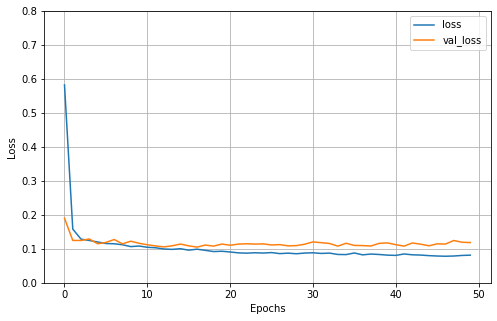

In [84]:
#Plots
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.8) # set the vertical range to [0-1]
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

### Cerca hiperparàmetres

Un cop tenim el model base ens interessa cercar la configuració d'hiperparàmetres que ens proporcioni una millor predicció del preu de revenda dels cotxes. En aquest apartat farem una cerca d'hiperparàmetres, recorrent diversos valors de nombre de capes, nombre de neurones, mida del batch i èpoques.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici (1.75 punts):</strong> Implementa una funció que avaluï diferents models combinant les següents característiques:
<ul>
   <li>Tres arquitectures diferents amb les següents configuracions de nombre de capes ocultes (completament connectades) i nombre de neurones a cada capa:</li>
        <ul>
        <li>[128, 64, 16]</li>
        <li>[16, 4]</li>
        <li>[4, 4]</li>
        </ul>
   <li>Mida del batch de 16 i 32</li>
   <li>Èpoques de 20, 50 i 100</li>
</ul>
    
    
Com en l'exercici anterior, la primera capa oculta tindrà sempre activació ReLU i les altres activació tangencial. L'inicialitzador de kernel estarà en mode 'normal' i farem servir l'optimitzador Adam.

    
La funció haurà de proporcionar una taula amb els camps següents: arquitectura de la xarxa seleccionada, èpoques, mida del batch, temps d'entrenament i arrel de l'error quadràtic mitjà (RMSE) del model

-------------------------------------------------- -------------------------------------------------- -------
<b>Important</b>: per al lliurament de la PAC, fixar el paràmetre <code>verbose = 0</code> a l'entrenament dels models. La solució només ha de mostrar la taula resultant.
</div>

In [85]:
# Import KerasRegressor class
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

# Define the model trhough a user-defined function
def create_model(hiddenAndNeurons):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(hiddenAndNeurons[0], activation="relu", input_shape=X_train.shape[1:], kernel_initializer='normal'))          
    for i in range(1, len(hiddenAndNeurons)):
        model.add(keras.layers.Dense(hiddenAndNeurons[i], activation="tanh"))  
    model.add(keras.layers.Dense(1))
    model.compile(loss='mse', metrics=['mse'], optimizer="adam") # compile the model
    return model

model = KerasRegressor(build_fn=create_model, verbose=1)

# Define the hyperparameters grid to be validated
param_grid = {
    "hiddenAndNeurons": [[128, 64, 16], [16, 4], [4, 4]],
    "batch_size": [16, 32],
    "epochs": [20, 50, 100],
}
model = KerasRegressor(build_fn=create_model, verbose=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

# Run the GridSearchCV process
grid_result = grid.fit(X_train, y_train, verbose = 0)

<ipython-input-85-d4c908f44f3e>:15: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=1)
<ipython-input-85-d4c908f44f3e>:23: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=1)


In [86]:
table = pd.concat([pd.DataFrame(grid_result.cv_results_["params"]),
                   pd.DataFrame(grid_result.cv_results_["mean_fit_time"], columns=["Time"]),
                   pd.DataFrame(grid_result.cv_results_["mean_test_score"], columns=["RMSE"])],axis=1)

table

,batch_size,epochs,hiddenAndNeurons,Time,RMSE
0,16,20,"[128, 64, 16]",2.354532,-0.129255
1,16,20,"[16, 4]",1.888226,-0.143969
2,16,20,"[4, 4]",1.529049,-0.166509
3,16,50,"[128, 64, 16]",3.754753,-0.129021
4,16,50,"[16, 4]",3.765856,-0.125306
5,16,50,"[4, 4]",3.938292,-0.125478
6,16,100,"[128, 64, 16]",8.125942,-0.132403
7,16,100,"[16, 4]",7.602928,-0.126003
8,16,100,"[4, 4]",6.436159,-0.129863
9,32,20,"[128, 64, 16]",1.895332,-0.128680


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici (0.25 punts):</strong> Representa en un gràfic el RMSE vs la configuració dels models

</div>

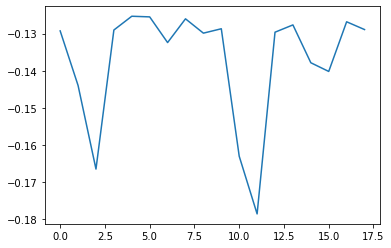

In [95]:
#Plot
plt.plot(table['RMSE'])

### Elecció millor model i predicció

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici (1 punt):</strong> Identifica la configuració que proporciona millors resultats:
<ul>
<li>Justifica l'elecció del model</li>
<li>Compila i entrena el model triat. Nota: per al lliurament, presentar amb verbose=0</li>
<li>Mostra la corresponent gràfica de pèrdua dels conjunts d'entrenament i validació</li>
<li>Calcula les prediccions del preu i mostra en una taula el Preu original (<code>price</code>) i el Preu predit (<code>predicted_price</code>) per a les 10 primeres files del conjunt de test</li>
<li>Comenta els resultats obtinguts</li>
</ul> 
</div>

In [96]:
#Best configuration justification
#Print the results of the best model
print('Best params: ' + str(grid_result.best_params_))

Best params: {'batch_size': 16, 'epochs': 50, 'hiddenAndNeurons': [16, 4]}


In [97]:
#Create, compile and fit ANN best model
model = keras.models.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=X_train.shape[1:], kernel_initializer='normal'),
    keras.layers.Dense(4, activation="tanh", kernel_initializer='normal'),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="adam")

history = model.fit(X_train, y_train, epochs=50, batch_size=16, 
                    validation_data=(X_test, y_test), verbose=0)

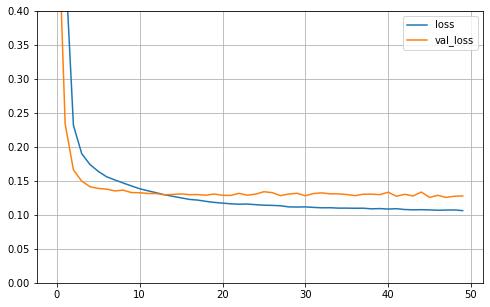

In [98]:
#Plot
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.4) # set the vertical range to [0-1]
plt.show()

   Correct price  Predicted price
0      -0.270520        -0.324610
1      -0.780766        -0.573624
2      -0.218116         0.446988
3       0.460373         0.483207
4      -0.504957        -0.727454
5       1.991111         1.708602
6      -0.353263        -0.217628
7       1.977321         2.489145
8      -0.863509        -0.736378
9      -0.285689        -0.060192


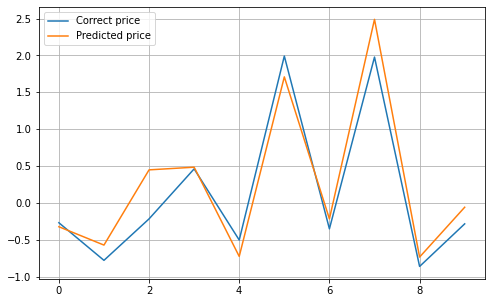

In [100]:
#Generate Predictions on testing data
new_data = X_test[:10]
correct_price = y_test[:10]
predicted_price = model.predict(new_data)

table = pd.concat([pd.DataFrame(correct_price, columns=["Correct price"]),
                   pd.DataFrame(predicted_price, columns=["Predicted price"])],  axis=1)

print(table)
table.plot(figsize=(8, 5))
plt.grid(True)
plt.show()

* **Comment results**

<font color='blue'> Del gràfic veiem que aconseguim un resultat més que decent, amb prediccions de preus molt properes a la realitat. D'aquests preus podem destacar que el 2 és l'únic que no segueix el patró establert, per tant probablement es tracta d'un outlier.